## Define the datasets

In [96]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization


## Define all the possible directories used for the project

In [97]:
competitionDataset = '/home/nour/Documents/University/4740/dogs-vs-cats/'

trainingDataset = '/home/nour/Documents/University/4740/dogs-vs-cats/train/'
testingDataset = '/home/nour/Documents/University/4740/dogs-vs-cats/test1/'

dogsDataset = '/home/nour/Documents/University/4740/dogs-vs-cats/train/dogs/'
catsDataset = '/home/nour/Documents/University/4740/dogs-vs-cats/train/cats/'

direc = os.chdir(trainingDataset)
trainingFiles = os.listdir(trainingDataset)


## Begin loading the image datasets

In [99]:
# use ImageDataGenerator to rotate through the dataset of images
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator
imageDataGenerator = ImageDataGenerator()

In [100]:
# print the current directory
print(os.getcwd())

/home/nour/Documents/University/4740/dogs-vs-cats/train


### Print the number of images in both 'cats' and 'dogs' classes

In [101]:
iterator = imageDataGenerator.flow_from_directory(
    os.getcwd(), 
    classes=('dogs','cats')
)

Found 25000 images belonging to 2 classes.


## Relabel Images
### Based on the requirements stated in the Kaggle competition, we need to relabel each image as one-hot encodings. 
### For example, if an image is one of a cat, the one-hot encoding will be [0, 1]. If an image is one of a dog, the one-hot encoding will be [1, 0].

In [110]:
def relabelImages(batch):
    
    imageFile = batch[0]
    imageLabel = batch[1]
    
    ncols = 4
    nrows = 8
    
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    
    for i, (img,label) in enumerate(zip(imageFile,imageLabel)):
        
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(img.astype(np.int))
        
        assert(label[0]+label[1]==1.)
        
        # if the one-hot encoding shows the animal is a dog, 
        if label[0] == 1:
            categoryAnimal = 'dog' # add the label to the picture
            
        # if the one-hot encoding shows the animal is a cat,
        elif label[0] == 0:
            categoryAnimal = 'cat'
    
        plt.title( '{} {}'.format(str(label), categoryAnimal))
        plt.axis('off')

## Display a few images to show the new labels

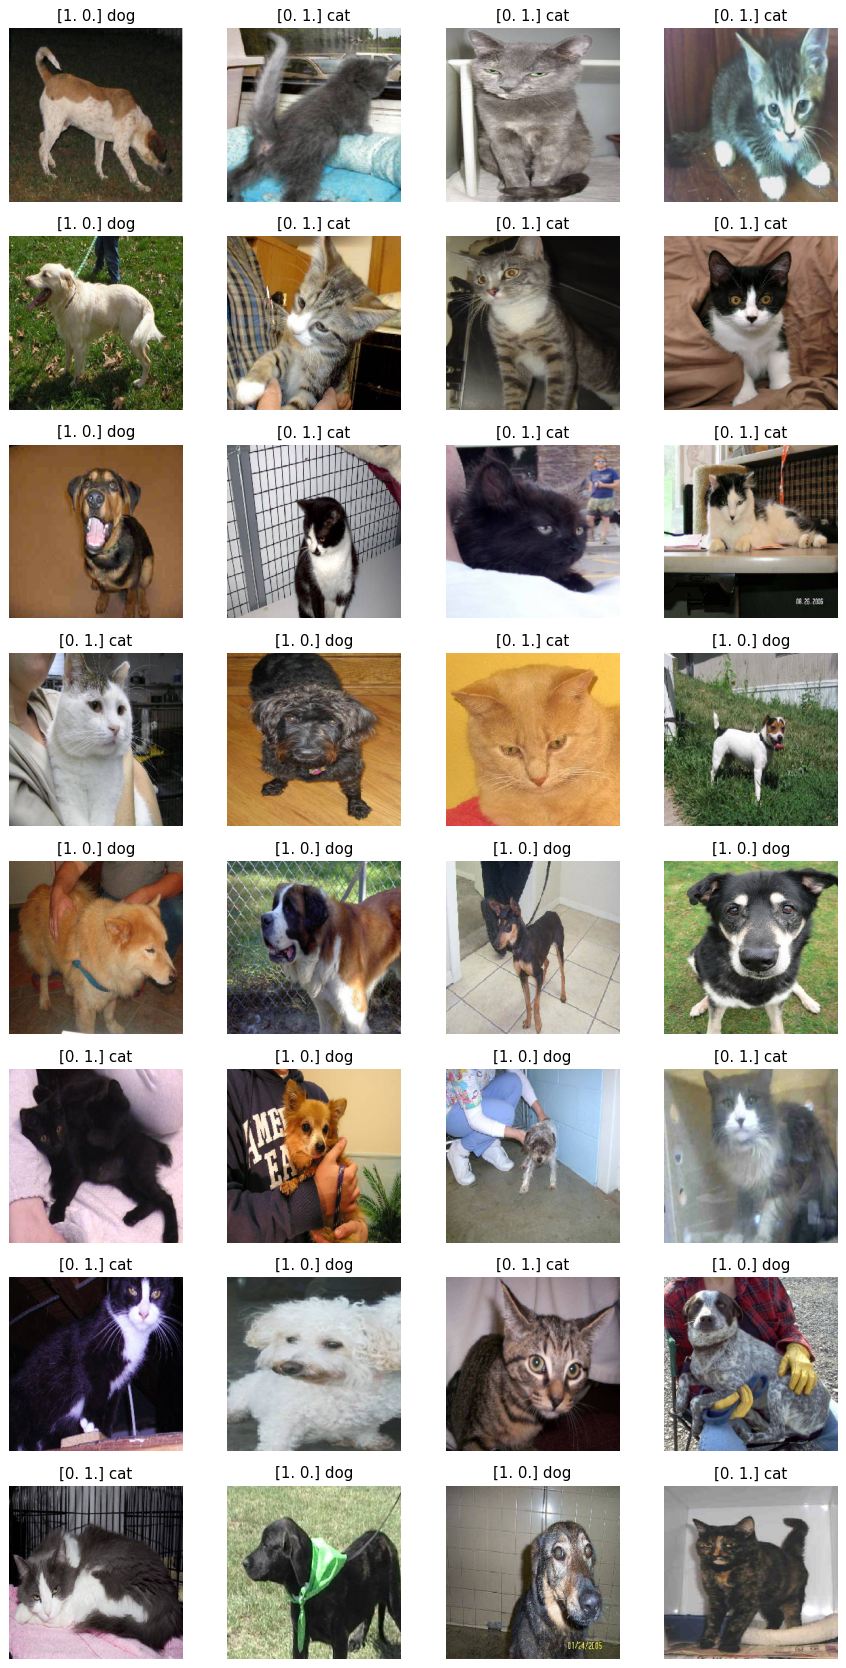

In [111]:
relabelImages(iterator.next())

# Create uniform qualities for all the images, Split the data

### We will use the 'rescale' function, used to multiply the data before processing the model. The original images are coloured, which may hinder the accuracy of the model as the values would be too high (between 0 - 255). The new values will be set between 0 - 1 by rescaling using 1/255.

### We will also split the data 80% for training and 20% for testing. 

In [112]:
unifromImages = ImageDataGenerator(
    rescale = 1 / 255., 
    validation_split = 0.2,
)

## As will be seen when printed, there will be a total of 20,000 images for the training set, and there will be a total of 5000 images for the validation dataset

In [162]:
os.getcwd()

'/home/nour/Documents/University/4740/dogs-vs-cats/train'

In [113]:
batch_size = 30

trainDataset = unifromImages.flow_from_directory(
    os.getcwd(),
    target_size = (256, 256), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

valDataset = unifromImages.flow_from_directory(
    os.getcwd(),
    target_size = (256, 256), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Create the CNN

In [114]:
model = keras.models.Sequential()

initializers = {}

model.add(keras.layers.Conv2D(24, 5, input_shape=(256,256,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(48, 5, activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(96, 5, activation='relu'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dropout(0.9))

model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 252, 252, 24)      1824      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 24)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 48)      28848     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 48)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 57, 57, 96)        115296    
_________________________________________________________________
flatten_1 (Flatten)          (None, 311904)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 311904)           

In [116]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])

In [118]:
generateModel = model.fit_generator(
    trainDataset, 
    validation_data = valDataset,
    workers = 10,
    epochs = 10,
)

Epoch 1/10
667/667 [==============================] - 1881s 3s/step - loss: 0.6088 - acc: 0.6625 - val_loss: 0.5462 - val_acc: 0.7254
Epoch 2/10
667/667 [==============================] - 2169s 3s/step - loss: 0.5417 - acc: 0.7252 - val_loss: 0.4925 - val_acc: 0.7644
Epoch 3/10
667/667 [==============================] - 2082s 3s/step - loss: 0.4997 - acc: 0.7577 - val_loss: 0.4785 - val_acc: 0.7694
Epoch 4/10
667/667 [==============================] - 1448s 2s/step - loss: 0.4543 - acc: 0.7886 - val_loss: 0.4376 - val_acc: 0.7976
Epoch 5/10
667/667 [==============================] - 1395s 2s/step - loss: 0.4223 - acc: 0.8075 - val_loss: 0.4256 - val_acc: 0.8004
Epoch 6/10
667/667 [==============================] - 1534s 2s/step - loss: 0.3974 - acc: 0.8192 - val_loss: 0.4008 - val_acc: 0.8248
Epoch 7/10
667/667 [==============================] - 1612s 2s/step - loss: 0.3718 - acc: 0.8346 - val_loss: 0.3927 - val_acc: 0.8286
Epoch 8/10
667/667 [==============================] - 1430s 2s

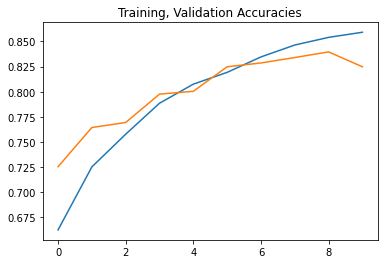

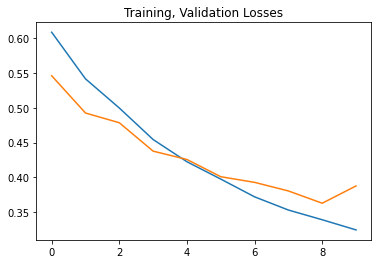

In [123]:
acc = generateModel.history['acc']
val_acc = generateModel.history['val_acc']
loss = generateModel.history['loss']
val_loss = generateModel.history['val_loss']
# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training, Validation Accuracies')

    
# Plot training and validation loss per epoch
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training, Validation Losses')
    
plt.show()

## Data Augmentation
### Due to the validation accuracy being ~82.48%, we want to augment the data in order to acheive a higher accuracy. 
### We will begin by removing certain images that do not help with training our model, as shown below:

In [135]:
uselessDogs = [5604, 6413, 8736, 8898, 9188, 9517, 10161, 10190, 10237, 10401, 10797, 11186]
uselessCats = [2939, 3216, 4688, 4833, 5418, 6215, 7377, 8456, 8470, 11565, 12272]


# ADD CODE TO DELETE CERTAIN IMAGES HERE IF WE WANT TO DO THAT

### Changes to the input photos can be applied, such as small shifts, horizontal and vertical flips. We applied seperate ImageDataGenerator functions for the train dataset and the training dataset.

In [176]:
trainDataGen = ImageDataGenerator( # for the training dataset:
    rescale = 1.0/255.0, # set the colour values between 0 and 1,
    
    width_shift_range = 0.1, # shift the 
    height_shift_range = 0.1, 
    
    horizontal_flip = True,
    zoom_range = 0.3, 
    rotation_range = 15.,
    
    validation_split = 0.2)

#testDataGen = ImageDataGenerator(rescale=1.0/255.0)

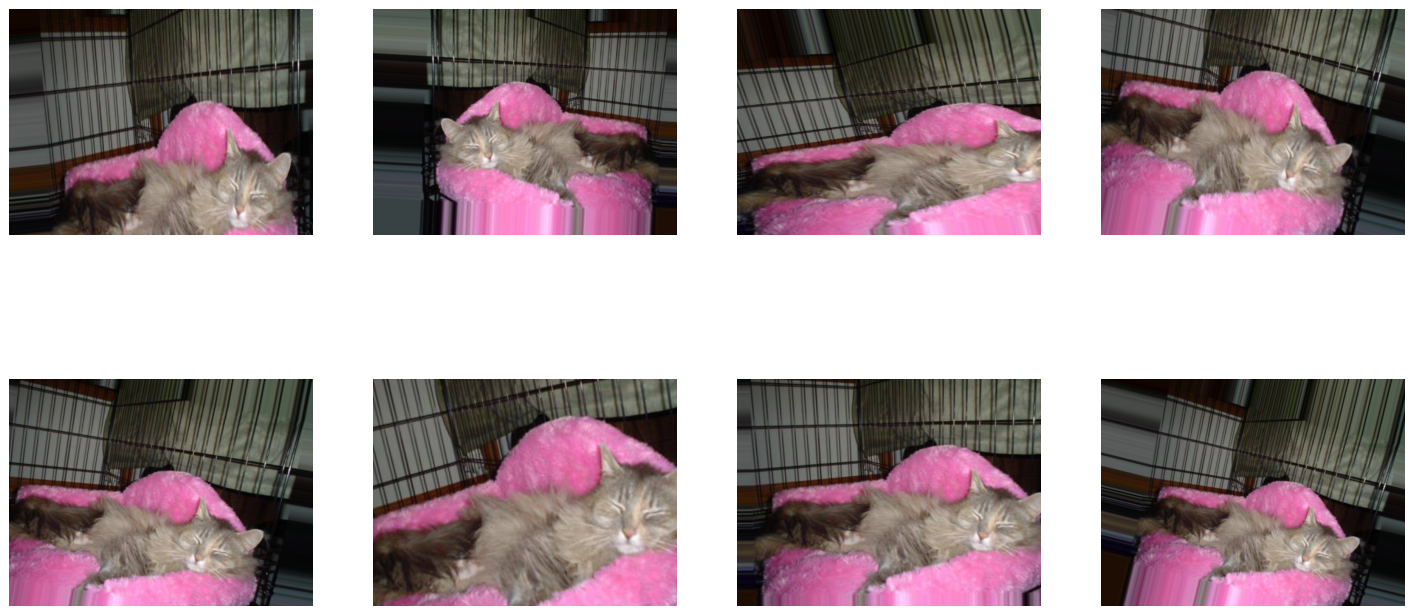

In [177]:
image = img.imread('cats/cat.120.jpg')

def printTransformedImage():
    
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*5, nrows*5), dpi=90)
    for i in range(nrows*ncols): 
        timage = trainDataGen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')
        
printTransformedImage()

In [178]:
batch_size = 30

train_dataset = trainDataGen.flow_from_directory(
    os.getcwd(),
    target_size = (256, 256), 
    classes = ('cats','dogs'),
    batch_size = batch_size,
    subset = 'training'
)

Found 20000 images belonging to 2 classes.


In [179]:
valDataset = trainDataGen.flow_from_directory(
    os.getcwd(),
    target_size = (256, 256), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 5000 images belonging to 2 classes.


## After augmenting the dataset, we can input it to the following CNN:

In [180]:
model = keras.models.Sequential()

initializers = {}

model.add(keras.layers.Conv2D(24, 5, input_shape=(256,256,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(48, 5, activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(96, 5, activation='relu'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 252, 252, 24)      1824      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 24)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 122, 122, 48)      28848     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 57, 57, 96)        115296    
_________________________________________________________________
flatten_2 (Flatten)          (None, 311904)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 311904)           

In [181]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])

/home/nour/.local/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
generateModelAugmented = model.fit_generator(
    train_dataset, 
    validation_data = valDataset,
    workers = 10,
    epochs = 20)

/home/nour/.local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
 81/667 [==>...........................] - ETA: 24:20 - loss: 0.7561 - acc: 0.5502

In [ ]:
plot_history(generateModelAugmented, (0.65, 1))